In [1]:
import math as ma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sta
from scipy import stats
import scipy.stats as st
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./Salary_Data.csv').fillna(0)
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df=pd.DataFrame(data)

male=df[df["Gender"]=="Male"]
female=df[df["Gender"]=="Female"]

bachelor=df[df["Education Level"]=="Bachelor's"]
master=df[df['Education Level']== "Master's"]
phd=df[df["Education Level"]=="PhD"]

se=df[df["Job Title"]=="Software Engineer"]

In [4]:
confidence_level = 0.05
z_alpha = stats.norm.ppf(1-confidence_level)
z_alpha_div2 = stats.norm.ppf(1-confidence_level/2)

In [5]:
# 1. Test a hypothesis and construct a confidence interval for the mean of a population.
    ## Confidence interval of the mean salary of employees who is Software Engineering
print("Software Engineering salary: ", st.t.interval(confidence=0.95, df=len(se['Salary']), loc=np.mean(se['Salary'])), "$")
    ## Hypothesis testing of the mean salary who is a SE not exceed 130000
        ### H0 : mean=130.000 || H1 : mean < 130.0000
z0=(np.mean(bachelor['Salary'])-130000)/(sta.stdev(se['Salary'])/ma.sqrt(len(se['Salary'])))
print('Hypothesis testing of the mean salary who is a Bachelor not exceed 130.000')
print("z0 = ", z0, " < -z_alpha = ", -z_alpha) 
print("==> Reject H0")

print("P-value: ", norm.cdf(z0, 0, 1))

# VUONG

Software Engineering salary:  (113241.2786890471, 113245.20779743938) $
Hypothesis testing of the mean salary who is a Bachelor not exceed 130.000
z0 =  -2.479343595172345  < -z_alpha =  -1.6448536269514722
==> Reject H0
P-value:  0.006581222133193167


In [6]:
# 2. Test a hypothesis and construct a confidence interval for the proportion of a population.
    ## In the sample of new gradute employees, there are 20 employees who have salary >=100000. Find the confidence interval.
new_gradute_employee=df[(df["Years of Experience"] <= 1)]["Salary"]
print("Mean salary of new graduate employeee: ",np.mean(new_gradute_employee))
satisfy_employee=df[(df["Years of Experience"] <= 1) & (df["Salary"]>=100000)]
p=len(satisfy_employee)/len(new_gradute_employee)
upper_confidence=p+z_alpha_div2*ma.sqrt(p*(1-p)/len(new_gradute_employee))
lower_confidence=p-z_alpha_div2*ma.sqrt(p*(1-p)/len(new_gradute_employee))
print('Confidence interval of employees has salary >=100000$: ')
print(lower_confidence, "<= p <= ", upper_confidence)
    ## Hypothesis Testing: The rate of 20 new gradute employees who have salary >=100000 not exceed 0.05. 
        ### H0 : p = 0.05 | H1 : p < 0.05
z0=(len(satisfy_employee)-len(new_gradute_employee)*0.05)/ma.sqrt(len(new_gradute_employee)*0.05*(1-0.05))
print('Hypothesis Testing: ')
print("z0=", z0, " < z_alpha=", -z_alpha)
print("==> Reject H0")

print("P-value: ", norm.cdf(z0, 0, 1))
# HUNG: 

Mean salary of new graduate employeee:  43633.68222891566
Confidence interval of employees has salary >=100000$: 
0.017120166089211505 <= p <=  0.04312079776621018
Hypothesis Testing: 
z0= -2.350407080326017  < z_alpha= -1.6448536269514722
==> Reject H0
P-value:  0.009376444602722639


In [7]:
# 3. Test a hypothesis and construct a confidence interval for the difference in means of two populations.
    ## Confidence interval of the means of Salary of 2 sample Male and Female

def upper_confidence(mean_a, mean_b, z_alpha_div2, stdev_a, stdev_b, len_a, len_b):
    return mean_a-mean_b+z_alpha_div2*ma.sqrt(pow(stdev_a, 2)/len_a+pow(stdev_b, 2)/len_b)
def lower_confidence(mean_a, mean_b, z_alpha_div2, stdev_a, stdev_b, len_a, len_b):
    return mean_a-mean_b-z_alpha_div2*ma.sqrt(pow(stdev_a, 2)/len_a+pow(stdev_b, 2)/len_b)

print("Male employees's salary exceed Female's: (", lower_confidence(np.mean(male["Salary"]), np.mean(female["Salary"]), z_alpha_div2, sta.stdev(male["Salary"]), sta.stdev(female["Salary"]), len(male), len(female)), ", ", upper_confidence(np.mean(male["Salary"]), np.mean(female["Salary"]), z_alpha_div2, sta.stdev(male["Salary"]), sta.stdev(female["Salary"]), len(male), len(female)), ')')
    ## H0 : mean_male_salary = mean_female_salary | H1 : mean_male_salary - mean_female_salary > 10000
def z_zero(mean_a, mean_b, mean_zero, stdev_a, stdev_b, len_a, len_b):
    return (mean_a-mean_b-mean_zero)/ma.sqrt(pow(stdev_a, 2)/len_a+pow(stdev_b, 2)/len_b)
print('Hypothesis Testing: ')
z0=z_zero(np.mean(male["Salary"]), np.mean(female["Salary"]), 10000, sta.stdev(male["Salary"]), sta.stdev(female["Salary"]), len(male), len(female))
print("z0=", z0, " > z_alpha=", z_alpha)
print("Reject to H0")

print("P-value: ", 1-norm.cdf(z0, 0, 1))

# TRIEU

Male employees's salary exceed Female's: ( 10942.572604524728 ,  15998.602792524587 )
Hypothesis Testing: 
z0= 2.690738243786877  > z_alpha= 1.6448536269514722
Reject to H0
P-value:  0.0035647054545309143


In [8]:
# 4. Test a hypothesis and construct a confidence interval for the difference in proportions of two populations.
    ## Confidence interval of the propotions of Years of Experience(>=20) of 2 sample Male and Female
male_satisfy=df[(df["Gender"]=="Male") & (df["Years of Experience"]>=20)]
female_satisfy=df[(df["Gender"]=="Female") & (df["Years of Experience"]>=20)]
p1=len(male_satisfy)/len(male)
p2=len(female_satisfy)/len(female)

upper_confidence=p1-p2+z_alpha_div2*ma.sqrt(p1*(1-p1)/len(male)+p2*(1-p2)/len(female))
lower_confidence=p1-p2-z_alpha_div2*ma.sqrt(p1*(1-p1)/len(male)+p2*(1-p2)/len(female))
print('Confidence Interval: ')
print("Male employees's years of experience(>=20) exceed Female's: (", lower_confidence, ", ", upper_confidence, ')')
    ## H0 : p1=p2 | H1 : p1 > p2
p=(len(male_satisfy)+len(female_satisfy))/(len(male)+len(female))
z0=(p1-p2)/ma.sqrt(p*(1-p)*(1/len(male)+1/len(female)))
print('Hypothesis Testing: ')
print("z0= ", z0, " > z_alpha", z_alpha)
print("==> Reject to H0")

print("P-value: ", 1-norm.cdf(z0, 0, 1))

# HOANG

Confidence Interval: 
Male employees's years of experience(>=20) exceed Female's: ( 0.004545560261131893 ,  0.02413894200176104 )
Hypothesis Testing: 
z0=  2.8239344833146616  > z_alpha 1.6448536269514722
==> Reject to H0
P-value:  0.0023719040388737733


In [9]:
# 5a
X = se["Years of Experience"]
Y = se["Salary"]

# HOAI

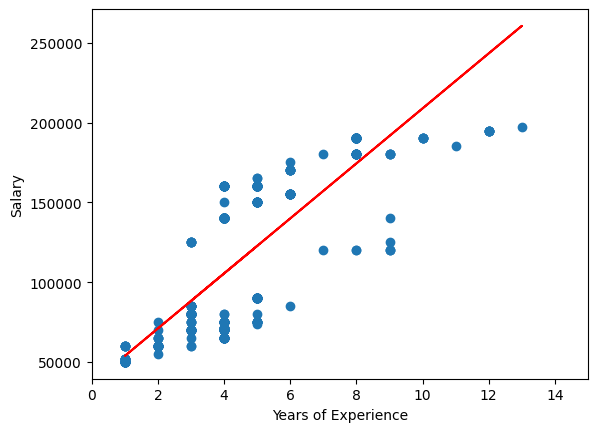

In [10]:
# 5b
plt.scatter(X, Y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.xlim(0, 15)
   # Create a linear regression model
model = LinearRegression()
model.fit(np.array(X).reshape(-1, 1), Y)  # Reshape X to a 2D array
    # Get the coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_
    # Predicted line
predicted_salary = slope * X + intercept

    # Plot the line
plt.plot(X, predicted_salary, color='red')

In [11]:
# 5c
    # Sample correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(X, Y)

    # Print the result
print("Sample Correlation Coefficient (Pearson's r):", correlation_coefficient)
print(p_value)

Sample Correlation Coefficient (Pearson's r): 0.7959507884300214
1.4574984180104114e-114


In [12]:
# 5d
    # Print the equation of the estimated regression line
print("Equation of Estimated Regression Line: Y =", intercept, "+", slope, "X")

    # Predict a future value for Y (replace with your desired experience value)
predicted_salary = intercept + slope * 20 # Assuming 20 years of experience

print("Predicted Salary for 20 Years of Experience:", predicted_salary)

Equation of Estimated Regression Line: Y = 36586.37803854488 + 17227.009186999458 X
Predicted Salary for 20 Years of Experience: 381126.5617785341


In [13]:
# 5e
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Reshape X_test to a 2D array
X_test_reshaped = X_test.values.reshape(-1, 1)  # Reshape to a column vector

# Use X_test_reshaped for prediction with model.score
r_squared = model.score(X_test_reshaped, y_test)
# Interpretation
if r_squared < 0.05:  # Adjust significance level as needed
  print("The model is statistically significant (p-value < 0.05).")
else:
  print("The model is not statistically significant (p-value >= 0.05).")

print(r_squared)

The model is not statistically significant (p-value >= 0.05).
0.6836976983579149
